# Support vector machine . LR

In [1]:
## WE allow errors symmerticity both sides of regression line upto some value.

In [4]:
##sigma- insensitive tube slack variables  # ita-i and ita-i* (say)

In [ ]:
## points outside the tube are vectors(duh) and since they kinda support the structure

## SVM PATH

### 1.Sections on SVM

#### SVM Intuition

### 2.Section on Kernel SVM

#### 2.1Kernel SVM Intuition

#### 2.2Mapping to a higher dimension

#### 2.3The Kernel Trick

#### 2.4 Type of kernel functions

#### 2.5 Non-Linear Kernel SVR

### Begin: import libraries and data file

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

In [79]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [80]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Feature scaling

In [81]:
## apply to both X and y

In [68]:
##need to transform y into 2D array as our function expects

In [82]:
y = y.reshape(len(y),1)

In [83]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [84]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #one fitted to mean and other to stddev.. sonot apply same sc on both..
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [85]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [86]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [87]:
#y = y.reshape([1,10])

In [88]:
#print(y)

In [97]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') ###we have to use a parameter[to specify kernal]
regressor.fit(X,y.ravel()) ###pay attention to ravel function

SVR()

## Predicting a new result

In [99]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

In [102]:
###Transform ____ Inverse Transform

## Visualising the results

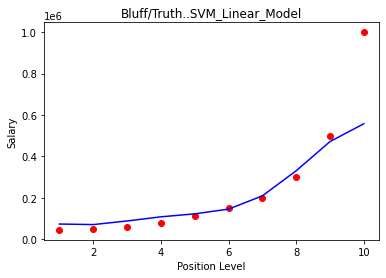

In [110]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color='blue')
plt.title('Bluff/Truth..SVM_Linear_Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualise with HiRes and Smoother curve

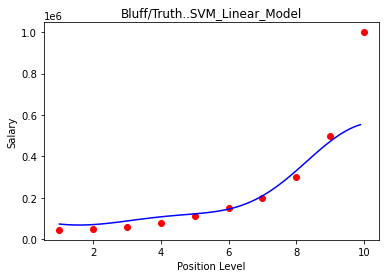

In [115]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid)),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))),color='blue')
plt.title('Bluff/Truth..SVM_Linear_Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()